In [ ]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
import os
import time


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plt_image

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as keras_image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

from tensorflow.keras.callbacks import TensorBoard
%load_ext tensorboard

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Sekarang, Anda dapat mengakses Drive di folder /content/drive/MyDrive/


Mounted at /content/drive


In [ ]:
import zipfile

zip_path = '/content/drive/MyDrive/Kaggle/archive_3.zip' # Sesuaikan path dengan lokasi file zip Anda di Google Drive
extract_path = '/content/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
import zipfile

zip_path_normal_skin = '/content/drive/MyDrive/Kaggle/normal skin.zip' # Sesuaikan path dengan lokasi file zip normal skin di Google Drive
extract_path_normal_skin = '/content/'

with zipfile.ZipFile(zip_path_normal_skin, 'r') as zip_ref_normal_skin:
    zip_ref_normal_skin.extractall(extract_path_normal_skin)


In [ ]:
import os

# Path ke folder yang berisi gambar-gambar
image_folder = '/content/melanoma_cancer_dataset'

# Daftar nama folder
folder_names = [folder for folder in os.listdir(image_folder) if os.path.isdir(os.path.join(image_folder, folder))]

# Tampilkan daftar nama folder
print("Nama-nama folder:")
for folder_name in folder_names:
    print(folder_name)

    # Path ke subfolder di dalam setiap folder
    subfolder_path = os.path.join(image_folder, folder_name)

    # Daftar nama subfolder di dalam setiap folder
    subfolder_names = [subfolder for subfolder in os.listdir(subfolder_path) if os.path.isdir(os.path.join(subfolder_path, subfolder))]

    # Tampilkan daftar nama subfolder di dalam setiap folder
    print("Subfolder di dalam folder", folder_name)
    for subfolder_name in subfolder_names:
        print(subfolder_name)


Nama-nama folder:
train
Subfolder di dalam folder train
malignant
benign
test
Subfolder di dalam folder test
malignant
benign


Folder: malignant


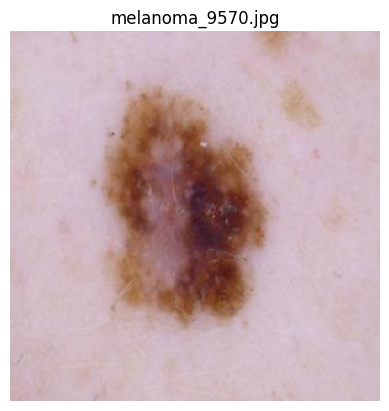

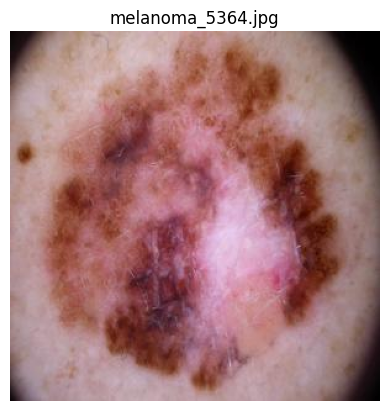

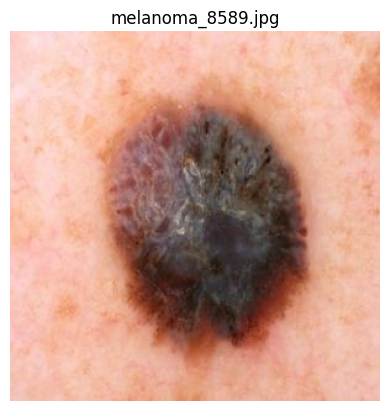

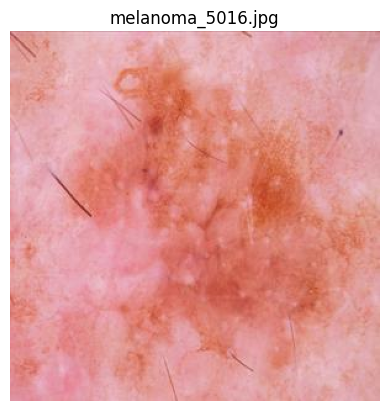

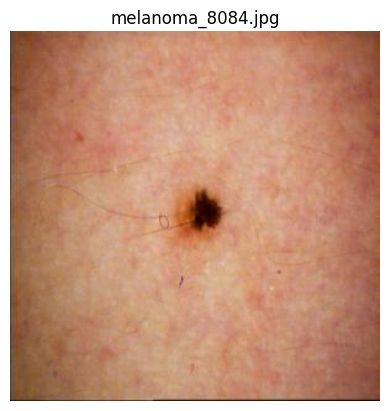

Folder: benign


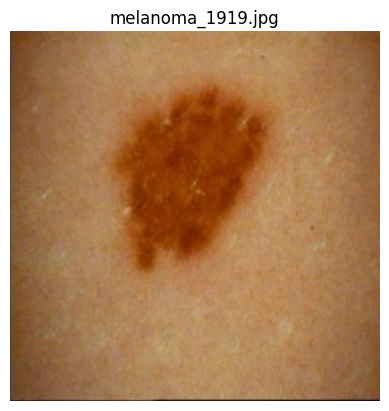

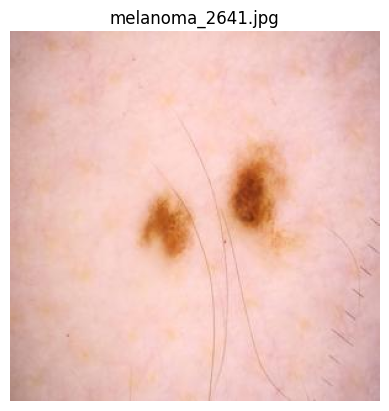

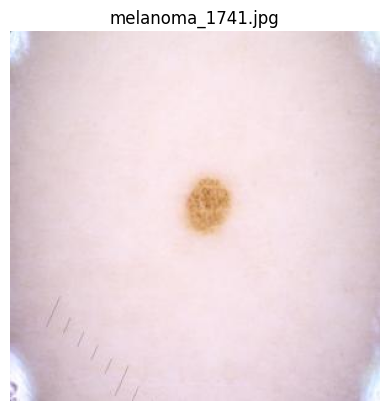

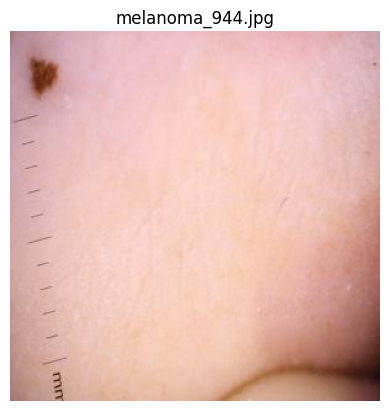

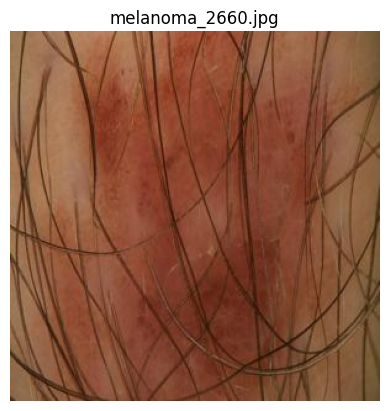

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path ke folder yang berisi gambar-gambar
image_folder = '/content/melanoma_cancer_dataset/train'

# Daftar nama folder
folder_names = [folder for folder in os.listdir(image_folder) if os.path.isdir(os.path.join(image_folder, folder))]

# Tampilkan 5 gambar dari setiap folder
for folder_name in folder_names:
    print(f"Folder: {folder_name}")
    folder_path = os.path.join(image_folder, folder_name)
    image_files = [file for file in os.listdir(folder_path) if file.endswith(('jpg', 'jpeg', 'png', 'gif'))]

    # Hanya menampilkan maksimal 5 gambar
    for i in range(min(5, len(image_files))):
        img_path = os.path.join(folder_path, image_files[i])
        img = Image.open(img_path)

        plt.imshow(img)
        plt.axis('off')
        plt.title(image_files[i])
        plt.show()


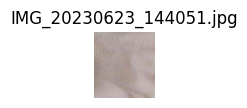

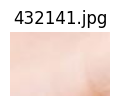

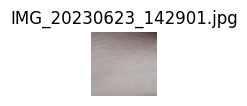

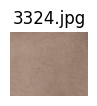

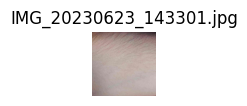

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path ke folder yang berisi gambar-gambar
image_folder_skin = "/content/normal skin"

# Mendapatkan daftar nama file gambar di folder
image_files_skin = os.listdir(image_folder_skin)

# Menampilkan 5 gambar dalam grid 1x1
num_images = min(5, len(image_files_skin))

# Menampilkan gambar-gambar
plt.figure(figsize=(5, 5))
for i in range(num_images):
    # Path lengkap untuk tiap gambar
    image_file_skin = image_files_skin[i]
    image_path_skin = os.path.join(image_folder_skin, image_file_skin)
    # Membaca gambar
    img_skin = mpimg.imread(image_path_skin)
    # Menampilkan gambar
    plt.subplot(5, 1, i+1)  # Menampilkan gambar dalam grid 1x1
    plt.imshow(img_skin)
    plt.axis('off')
    plt.title(image_file_skin)
    plt.show()
    print()

Folder: malignant


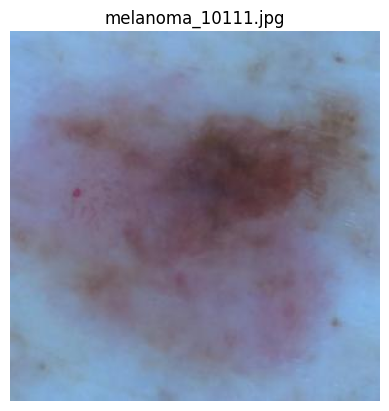

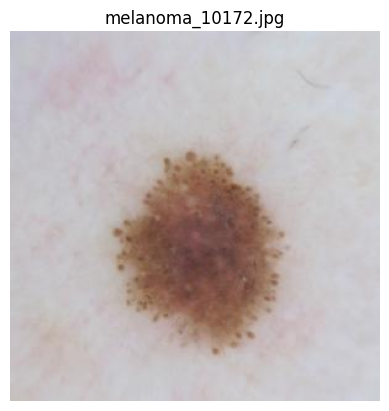

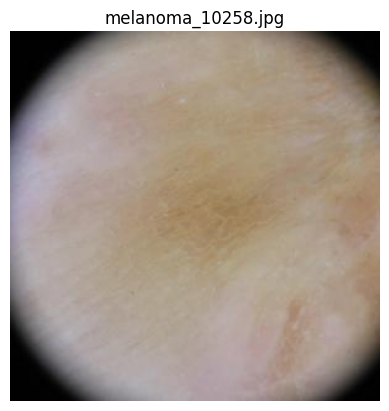

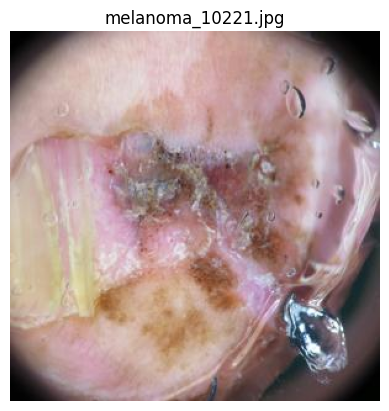

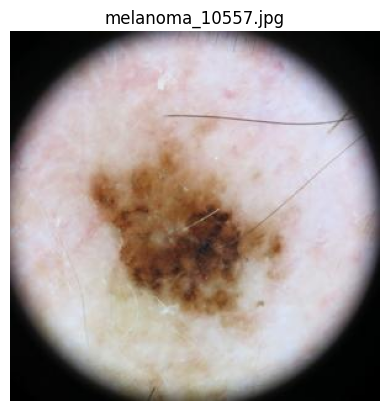

Folder: benign


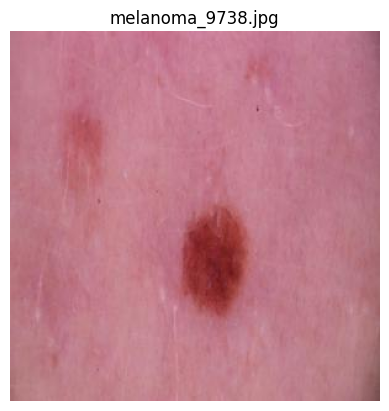

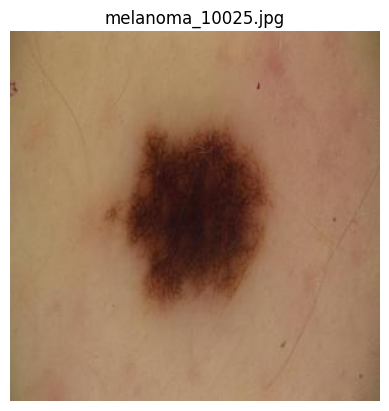

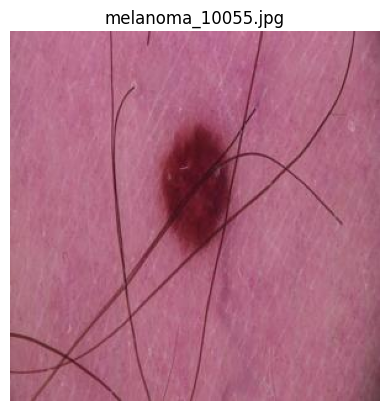

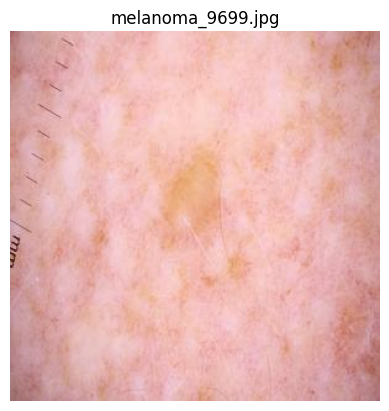

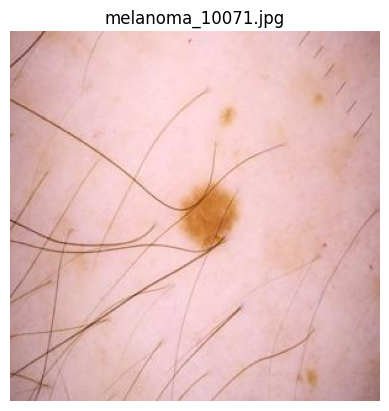

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path ke folder yang berisi gambar-gambar
image_folder = '/content/melanoma_cancer_dataset/test'

# Daftar nama folder
folder_names = [folder for folder in os.listdir(image_folder) if os.path.isdir(os.path.join(image_folder, folder))]

# Tampilkan 5 gambar dari setiap folder
for folder_name in folder_names:
    print(f"Folder: {folder_name}")
    folder_path = os.path.join(image_folder, folder_name)
    image_files = [file for file in os.listdir(folder_path) if file.endswith(('jpg', 'jpeg', 'png', 'gif'))]

    # Hanya menampilkan maksimal 5 gambar
    for i in range(min(5, len(image_files))):
        img_path = os.path.join(folder_path, image_files[i])
        img = Image.open(img_path)

        plt.imshow(img)
        plt.axis('off')
        plt.title(image_files[i])
        plt.show()


In [ ]:
!pip install tensorflow
!pip install keras_cv
import os
os.environ["KERAS_BACKEND"] = "jax" # or "tensorflow", "torch"

import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

import tensorflow as tf
import keras_cv
import keras_core as keras
from keras_core import ops

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 37.9 MB/s eta 0:00:00
Using JAX backend.


In [ ]:
from PIL import Image

Image.MAX_IMAGE_PIXELS = None

In [ ]:
import os
import pandas as pd
from PIL import Image

# Tentukan path folder gambar
base_path = '/content/melanoma_cancer_dataset/train'

# Inisialisasi list untuk menyimpan path gambar dan label
image_paths = []
labels = []

# Loop melalui setiap kategori (rock, paper, scissors)
categories = ['benign','malignant']

for category in categories:
    category_path = os.path.join(base_path, f'{category}')
    category_files = os.listdir(category_path)

    # Loop melalui setiap gambar dalam kategori tertentu
    for image_file in category_files:
        # Bangun path lengkap ke gambar
        image_path = os.path.join(category_path, image_file)

        # Simpan path gambar dan label ke dalam list
        image_paths.append(image_path)
        labels.append(category)

# Buat dataframe
data = {'Image_Path': image_paths, 'Label': labels}
df = pd.DataFrame(data)


In [ ]:
df

Image_Path      Label
0     /content/melanoma_cancer_dataset/train/benign/...     benign
1     /content/melanoma_cancer_dataset/train/benign/...     benign
2     /content/melanoma_cancer_dataset/train/benign/...     benign
3     /content/melanoma_cancer_dataset/train/benign/...     benign
4     /content/melanoma_cancer_dataset/train/benign/...     benign
...                                                 ...        ...
9600  /content/melanoma_cancer_dataset/train/maligna...  malignant
9601  /content/melanoma_cancer_dataset/train/maligna...  malignant
9602  /content/melanoma_cancer_dataset/train/maligna...  malignant
9603  /content/melanoma_cancer_dataset/train/maligna...  malignant
9604  /content/melanoma_cancer_dataset/train/maligna...  malignant

[9605 rows x 2 columns]

In [ ]:
import os
from PIL import Image, ImageEnhance

# Path ke folder yang berisi gambar-gambar
image_folder_skin = "/content/normal skin"

# Mendapatkan daftar nama file gambar di folder
image_files_skin = os.listdir(image_folder_skin)

# Membuat folder baru untuk menyimpan hasil augmentasi
output_folder = "/content/augmented_skin"
os.makedirs(output_folder, exist_ok=True)

# Membuat daftar augmentasi yang ingin dilakukan
augmentations = [
    ("original", lambda img: img),  # Tidak ada augmentasi
    ("rotate1", lambda img: img.rotate(45)),  # Rotasi 45 derajat
    ("rotate2", lambda img: img.rotate(2*45)),  # Rotasi 90 derajat
    ("rotate3", lambda img: img.rotate(3*45)),  # Rotasi 135 derajat
    ("rotate4", lambda img: img.rotate(4*45)),  # Rotasi 180 derajat
    ("rotate5", lambda img: img.rotate(5*45)),  # Rotasi 225 derajat
    ("rotate6", lambda img: img.rotate(6*45)),  # Rotasi 270 derajat
    ("rotate7", lambda img: img.rotate(7*45)),  # Rotasi 315 derajat
    ("grayscale", lambda img: img.convert("L")),  # Konversi ke grayscale
    ("enhanced", lambda img: ImageEnhance.Contrast(img).enhance(2.0)),  # Meningkatkan kejelasan
    ("horizontal_flip", lambda img: img.transpose(method=Image.FLIP_LEFT_RIGHT)),  # Flip horizontal
    ("vertical_flip", lambda img: img.transpose(method=Image.FLIP_TOP_BOTTOM)),  # Flip vertikal
    ("zoom_in", lambda img: img.crop((20, 20, img.width - 20, img.height - 20))),  # Perbesar (crop)
    ("zoom_out", lambda img: img.resize((int(img.width*0.8), int(img.height*0.8))))  # Perkecil
]

# Melakukan augmentasi pada setiap gambar
for image_file in image_files_skin:
    image_path = os.path.join(image_folder_skin, image_file)
    with Image.open(image_path) as img:
        # Melakukan setiap jenis augmentasi
        for name, func in augmentations:
            augmented_img = func(img.copy())
            # Menyimpan gambar hasil augmentasi
            output_path = os.path.join(output_folder, f"{name}_{image_file}")
            augmented_img.save(output_path)

print("Augmentasi selesai.")


Augmentasi selesai.


In [ ]:
import os
import pandas as pd

# Mendefinisikan direktori
image_dir = "/content/augmented_skin"

# Mendapatkan list semua file di direktori
image_files = os.listdir(image_dir)

# Filter hanya file gambar
image_files = [file for file in image_files if file.endswith('.jpg')]

# Membuat list path lengkap untuk setiap gambar
image_paths = [os.path.join(image_dir, img_file) for img_file in image_files]

# Membuat DataFrame
df1 = pd.DataFrame({'Image_Path': image_paths, 'Label': 'normal'})



In [ ]:
df1

Image_Path   Label
0           /content/augmented_skin/rotate5_32dasdf.jpg  normal
1        /content/augmented_skin/rotate7_3124e132as.jpg  normal
2        /content/augmented_skin/rotate3_3432153125.jpg  normal
3     /content/augmented_skin/rotate4_IMG_20230623_1...  normal
4       /content/augmented_skin/enhanced_1231234asd.jpg  normal
...                                                 ...     ...
1731  /content/augmented_skin/zoom_out_123412eascxz.jpg  normal
1732  /content/augmented_skin/original_13241324xasfd...  normal
1733        /content/augmented_skin/zoom_out_sdcvzx.jpg  normal
1734     /content/augmented_skin/rotate4_1231234asd.jpg  normal
1735  /content/augmented_skin/rotate1_IMG_20230623_1...  normal

[1736 rows x 2 columns]

In [ ]:
df

Image_Path      Label
0     /content/melanoma_cancer_dataset/train/benign/...     benign
1     /content/melanoma_cancer_dataset/train/benign/...     benign
2     /content/melanoma_cancer_dataset/train/benign/...     benign
3     /content/melanoma_cancer_dataset/train/benign/...     benign
4     /content/melanoma_cancer_dataset/train/benign/...     benign
...                                                 ...        ...
9600  /content/melanoma_cancer_dataset/train/maligna...  malignant
9601  /content/melanoma_cancer_dataset/train/maligna...  malignant
9602  /content/melanoma_cancer_dataset/train/maligna...  malignant
9603  /content/melanoma_cancer_dataset/train/maligna...  malignant
9604  /content/melanoma_cancer_dataset/train/maligna...  malignant

[9605 rows x 2 columns]

In [ ]:
# Menggabungkan dua dataframe secara kebawah
df = pd.concat([df, df1], ignore_index=True)


In [ ]:
# Membuat dictionary untuk encoding label
label_encoding = {'normal': 0, 'benign': 1, 'malignant': 2}

# Encoding label secara manual
df['Label'] = df['Label'].map(label_encoding)


In [ ]:
df

Image_Path  Label
0      /content/melanoma_cancer_dataset/train/benign/...      1
1      /content/melanoma_cancer_dataset/train/benign/...      1
2      /content/melanoma_cancer_dataset/train/benign/...      1
3      /content/melanoma_cancer_dataset/train/benign/...      1
4      /content/melanoma_cancer_dataset/train/benign/...      1
...                                                  ...    ...
11336  /content/augmented_skin/zoom_out_123412eascxz.jpg      0
11337  /content/augmented_skin/original_13241324xasfd...      0
11338        /content/augmented_skin/zoom_out_sdcvzx.jpg      0
11339     /content/augmented_skin/rotate4_1231234asd.jpg      0
11340  /content/augmented_skin/rotate1_IMG_20230623_1...      0

[11341 rows x 2 columns]

In [ ]:
from sklearn.model_selection import train_test_split

# Specify the size of the validation set
validation_size =2465

# Split the dataset into training and validation sets
train_df, validation_df = train_test_split(df, test_size=validation_size, random_state=42)
# Display the sizes of the training and validation sets
print(f"Number of samples in the training set: {len(train_df)}")
print(f"Number of samples in the validation set: {len(validation_df)}")


Number of samples in the training set: 8876
Number of samples in the validation set: 2465


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 23.5 MB/s eta 0:00:00


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Hitung class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(df['Label']),
    y=df['Label']
)

# Konversi class weights ke dalam dictionary
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}
print("Class Weights:", class_weight_dict)

Class Weights: {0: np.float64(2.177611367127496), 1: np.float64(0.7560666666666667), 2: np.float64(0.820919290626131)}


In [ ]:
import optuna
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# Assume `df` is a DataFrame containing 'Image_Path' and 'Label' columns
# Replace this with your actual dataset loading code
# df = pd.read_csv("your_dataset.csv")

# Define image size and channels
img_size = (256, 256)
channels = 3  # RGB

# Define the number of classes in your classification problem
num_classes = len(df['Label'].unique())

# Define the batch size
batch_size = 32

# Define a function to load and preprocess images
def load_and_preprocess_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=channels)
    image = tf.image.resize(image, img_size)
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
    return image, label

# Create train and validation datasets
train_df, validation_df = train_test_split(df, test_size=0.2, random_state=42)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['Label']),
    y=train_df['Label'].values
)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Define the image data generator for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create the image generator for training
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='Image_Path',
    y_col='Label',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='raw'  # Use 'raw' class mode when labels are integers
)

# Define the CNN model with L1 and L2 Regularization
def create_model(trial):
    l1 = trial.suggest_loguniform('l1_regularization', 1e-6, 1e-2)
    l2 = trial.suggest_loguniform('l2_regularization', 1e-6, 1e-2)
    regularizer = tf.keras.regularizers.l1_l2(l1=l1, l2=l2)

    model = models.Sequential()
    model.add(layers.Conv2D(
        trial.suggest_int('num_filters', 16, 128, log=False),
        (3, 3),
        activation='relu',
        kernel_regularizer=regularizer,
        input_shape=(img_size[0], img_size[1], channels)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(
        trial.suggest_int('num_filters', 16, 128, log=False),
        (3, 3),
        activation='relu',
        kernel_regularizer=regularizer))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(
        trial.suggest_int('num_filters', 16, 128, log=False),
        (3, 3),
        activation='relu',
        kernel_regularizer=regularizer))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizer))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Define the objective function for Optuna
def objective(trial):
    # Create the CNN model
    model = create_model(trial)

    # Compile the model
    optimizer = Adam(
        learning_rate=trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
    )
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Define the image data generator for validation
    validation_datagen = ImageDataGenerator(rescale=1./255)

    # Create the image generator for validation
    validation_generator = validation_datagen.flow_from_dataframe(
        validation_df,
        x_col='Image_Path',
        y_col='Label',
        target_size=img_size,
        batch_size=batch_size,
        class_mode='raw'  # Use 'raw' class mode when labels are integers
    )

    # Train the model using the generator for training and validation
    history = model.fit(
        train_generator,
        epochs=10,
        verbose=1,
        validation_data=validation_generator,
        class_weight=class_weights_dict  # Apply class weights during training
    )

    # Return the validation accuracy as the objective value to be maximized
    return history.history['val_accuracy'][-1]

# Create an Optuna study object and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=25)

# Get the best hyperparameters and the best accuracy
best_params = study.best_params
best_num_filters = best_params['num_filters']
best_learning_rate = best_params['learning_rate']
best_l1 = best_params['l1_regularization']
best_l2 = best_params['l2_regularization']
best_accuracy = study.best_value

# Print the best hyperparameters and the best accuracy
print("Best Hyperparameters:")
print(f"Number of Filters: {best_num_filters}")
print(f"Learning Rate: {best_learning_rate}")
print(f"L1 Regularization: {best_l1}")
print(f"L2 Regularization: {best_l2}")
print(f"Best Validation Accuracy: {best_accuracy:.4f}")


Found 9072 validated image filenames.


[I 2025-06-27 04:23:51,009] A new study created in memory with name: no-name-6c5bc872-d433-48cb-bf06-2f79e6b25903
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 2269 validated image filenames.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 156s 507ms/step - accuracy: 0.4156 - loss: 79.3929 - val_accuracy: 0.5355 - val_loss: 23.5520
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 130s 457ms/step - accuracy: 0.5380 - loss: 17.2655 - val_accuracy: 0.6417 - val_loss: 10.6426
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 461ms/step - accuracy: 0.5323 - loss: 10.2247 - val_accuracy: 0.6567 - val_loss: 9.0875
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 461ms/step - accuracy: 0.5288 - loss: 8.9687 - val_accuracy: 0.5853 - val_loss: 8.2120
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 130s 457ms/step - accuracy: 0.5346 - loss: 8.1071 - val_accuracy: 0.4209 - val_loss: 7.5242
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 130s 458ms/step - accuracy: 0.5507 - loss: 7.3741 - val_accuracy: 0.6364 - val_loss: 6.7918
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 129s 454ms/step - accuracy: 0.5558 - loss: 6.7134 - val_accuracy: 0.5178 - val_loss: 6.1744
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 129s 453ms/step - accuracy: 0.5

[I 2025-06-27 04:46:00,065] Trial 0 finished with value: 0.6967827081680298 and parameters: {'l1_regularization': 0.0021789271407613854, 'l2_regularization': 0.008850242052068098, 'num_filters': 82, 'learning_rate': 1.0956956740496873e-05}. Best is trial 0 with value: 0.6967827081680298.


Found 2269 validated image filenames.
Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 160s 515ms/step - accuracy: 0.4245 - loss: 11.7681 - val_accuracy: 0.6157 - val_loss: 2.5936
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 462ms/step - accuracy: 0.5768 - loss: 2.4717 - val_accuracy: 0.6792 - val_loss: 2.0850
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 462ms/step - accuracy: 0.6277 - loss: 2.1198 - val_accuracy: 0.6911 - val_loss: 1.8382
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 462ms/step - accuracy: 0.6482 - loss: 1.8760 - val_accuracy: 0.6950 - val_loss: 1.6296
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 134s 471ms/step - accuracy: 0.6648 - loss: 1.7077 - val_accuracy: 0.6928 - val_loss: 1.5366
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 134s 470ms/step - accuracy: 0.6571 - loss: 1.5981 - val_accuracy: 0.7012 - val_loss: 1.4365
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 464ms/step - accuracy: 0.6745 - loss: 1.4936 - val_accuracy: 0.7536 - val_loss: 1.3426
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━

[I 2025-06-27 05:08:36,660] Trial 1 finished with value: 0.7893345355987549 and parameters: {'l1_regularization': 0.0007564883913240463, 'l2_regularization': 6.724777450599245e-05, 'num_filters': 108, 'learning_rate': 0.0001623489916730023}. Best is trial 1 with value: 0.7893345355987549.


Found 2269 validated image filenames.
Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 143s 476ms/step - accuracy: 0.4347 - loss: 14.7771 - val_accuracy: 0.6210 - val_loss: 2.3347
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 130s 457ms/step - accuracy: 0.5887 - loss: 2.2486 - val_accuracy: 0.6977 - val_loss: 1.8992
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 130s 458ms/step - accuracy: 0.6539 - loss: 1.7834 - val_accuracy: 0.7691 - val_loss: 1.4300
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 463ms/step - accuracy: 0.6800 - loss: 1.5234 - val_accuracy: 0.7479 - val_loss: 1.3324
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 460ms/step - accuracy: 0.6937 - loss: 1.3849 - val_accuracy: 0.7743 - val_loss: 1.2218
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 130s 456ms/step - accuracy: 0.7180 - loss: 1.3013 - val_accuracy: 0.7625 - val_loss: 1.2279
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 130s 456ms/step - accuracy: 0.7150 - loss: 1.2730 - val_accuracy: 0.7832 - val_loss: 1.1502
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━

[I 2025-06-27 05:30:33,109] Trial 2 finished with value: 0.8021154403686523 and parameters: {'l1_regularization': 0.0011202729316822395, 'l2_regularization': 0.00011692251245936341, 'num_filters': 45, 'learning_rate': 7.6296981698775e-05}. Best is trial 2 with value: 0.8021154403686523.


Found 2269 validated image filenames.
Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 153s 502ms/step - accuracy: 0.4394 - loss: 4.5819 - val_accuracy: 0.7197 - val_loss: 1.4126
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 130s 459ms/step - accuracy: 0.6985 - loss: 1.4108 - val_accuracy: 0.7589 - val_loss: 1.3177
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 462ms/step - accuracy: 0.7108 - loss: 1.3766 - val_accuracy: 0.7519 - val_loss: 1.2195
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 461ms/step - accuracy: 0.7149 - loss: 1.3203 - val_accuracy: 0.7735 - val_loss: 1.1818
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 462ms/step - accuracy: 0.7324 - loss: 1.2700 - val_accuracy: 0.7682 - val_loss: 1.2377
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 460ms/step - accuracy: 0.7142 - loss: 1.2722 - val_accuracy: 0.7188 - val_loss: 1.2247
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 461ms/step - accuracy: 0.7389 - loss: 1.2473 - val_accuracy: 0.8127 - val_loss: 1.1350
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━━

[I 2025-06-27 05:52:44,908] Trial 3 finished with value: 0.7994711399078369 and parameters: {'l1_regularization': 0.00010825147556841149, 'l2_regularization': 2.6279793984624835e-06, 'num_filters': 71, 'learning_rate': 0.0023479658834915113}. Best is trial 2 with value: 0.8021154403686523.


Found 2269 validated image filenames.
Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 152s 501ms/step - accuracy: 0.4665 - loss: 4.5906 - val_accuracy: 0.6686 - val_loss: 1.5640
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 464ms/step - accuracy: 0.6526 - loss: 1.4846 - val_accuracy: 0.5619 - val_loss: 1.4019
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 133s 467ms/step - accuracy: 0.6873 - loss: 1.2576 - val_accuracy: 0.7893 - val_loss: 1.0649
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 463ms/step - accuracy: 0.7359 - loss: 1.0982 - val_accuracy: 0.8070 - val_loss: 0.9580
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 465ms/step - accuracy: 0.7600 - loss: 1.0192 - val_accuracy: 0.8435 - val_loss: 0.8436
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 464ms/step - accuracy: 0.7922 - loss: 0.9121 - val_accuracy: 0.8413 - val_loss: 0.8395
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 133s 466ms/step - accuracy: 0.8027 - loss: 0.8596 - val_accuracy: 0.8550 - val_loss: 0.7825
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━━

[I 2025-06-27 06:15:01,602] Trial 4 finished with value: 0.8704274892807007 and parameters: {'l1_regularization': 0.00014322118306777526, 'l2_regularization': 0.00015380647762615066, 'num_filters': 73, 'learning_rate': 3.1035396965685485e-05}. Best is trial 4 with value: 0.8704274892807007.


Found 2269 validated image filenames.
Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 147s 485ms/step - accuracy: 0.3525 - loss: 24.5102 - val_accuracy: 0.3874 - val_loss: 3.1232
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 130s 459ms/step - accuracy: 0.2270 - loss: 3.1103 - val_accuracy: 0.3874 - val_loss: 3.0800
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 129s 455ms/step - accuracy: 0.4162 - loss: 3.0596 - val_accuracy: 0.3874 - val_loss: 3.0862
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 130s 456ms/step - accuracy: 0.1860 - loss: 3.0752 - val_accuracy: 0.3874 - val_loss: 3.0570
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 130s 458ms/step - accuracy: 0.2573 - loss: 3.0698 - val_accuracy: 0.1490 - val_loss: 3.0550
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 459ms/step - accuracy: 0.2434 - loss: 3.0728 - val_accuracy: 0.3874 - val_loss: 3.0583
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 129s 455ms/step - accuracy: 0.3058 - loss: 3.0742 - val_accuracy: 0.4636 - val_loss: 3.0553
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━

[I 2025-06-27 06:36:57,394] Trial 5 finished with value: 0.46364036202430725 and parameters: {'l1_regularization': 0.0034481527436141697, 'l2_regularization': 0.00022585942186548175, 'num_filters': 69, 'learning_rate': 0.00031516381285888933}. Best is trial 4 with value: 0.8704274892807007.


Found 2269 validated image filenames.
Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 154s 502ms/step - accuracy: 0.4504 - loss: 2.9074 - val_accuracy: 0.6651 - val_loss: 1.2110
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 129s 454ms/step - accuracy: 0.6679 - loss: 1.1813 - val_accuracy: 0.8004 - val_loss: 0.8911
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 129s 455ms/step - accuracy: 0.7636 - loss: 0.9199 - val_accuracy: 0.8440 - val_loss: 0.7677
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 130s 457ms/step - accuracy: 0.7970 - loss: 0.8187 - val_accuracy: 0.8193 - val_loss: 0.7671
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 459ms/step - accuracy: 0.8188 - loss: 0.7341 - val_accuracy: 0.8409 - val_loss: 0.7273
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 460ms/step - accuracy: 0.8286 - loss: 0.6969 - val_accuracy: 0.8215 - val_loss: 0.7098
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 460ms/step - accuracy: 0.8375 - loss: 0.6662 - val_accuracy: 0.8775 - val_loss: 0.6284
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━━

[I 2025-06-27 06:59:03,190] Trial 6 finished with value: 0.8836491703987122 and parameters: {'l1_regularization': 7.64434945148804e-05, 'l2_regularization': 3.145407327348701e-05, 'num_filters': 93, 'learning_rate': 6.0398965481329474e-05}. Best is trial 6 with value: 0.8836491703987122.


Found 2269 validated image filenames.
Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 134s 457ms/step - accuracy: 0.4206 - loss: 1.5823 - val_accuracy: 0.6245 - val_loss: 0.9809
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 128s 449ms/step - accuracy: 0.6147 - loss: 0.9563 - val_accuracy: 0.6280 - val_loss: 0.9505
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 128s 452ms/step - accuracy: 0.6176 - loss: 0.9276 - val_accuracy: 0.6267 - val_loss: 0.9222
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 128s 451ms/step - accuracy: 0.6289 - loss: 0.8995 - val_accuracy: 0.6324 - val_loss: 0.9208
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 128s 449ms/step - accuracy: 0.6210 - loss: 0.8814 - val_accuracy: 0.6316 - val_loss: 0.9099
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 464ms/step - accuracy: 0.6271 - loss: 0.8799 - val_accuracy: 0.6135 - val_loss: 0.9553
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 128s 451ms/step - accuracy: 0.6147 - loss: 0.9098 - val_accuracy: 0.6329 - val_loss: 0.9063
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━━

[I 2025-06-27 07:20:33,550] Trial 7 finished with value: 0.6342000961303711 and parameters: {'l1_regularization': 1.8911160473358787e-06, 'l2_regularization': 5.367404820686184e-05, 'num_filters': 16, 'learning_rate': 0.0033315525346499955}. Best is trial 6 with value: 0.8836491703987122.


Found 2269 validated image filenames.
Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 161s 519ms/step - accuracy: 0.5071 - loss: 1.7366 - val_accuracy: 0.8167 - val_loss: 0.9473
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 463ms/step - accuracy: 0.7694 - loss: 0.9551 - val_accuracy: 0.8576 - val_loss: 0.7955
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 463ms/step - accuracy: 0.7990 - loss: 0.8414 - val_accuracy: 0.8643 - val_loss: 0.7386
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 133s 469ms/step - accuracy: 0.8287 - loss: 0.7472 - val_accuracy: 0.8616 - val_loss: 0.6970
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 463ms/step - accuracy: 0.8464 - loss: 0.6948 - val_accuracy: 0.8638 - val_loss: 0.6558
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 462ms/step - accuracy: 0.8558 - loss: 0.6409 - val_accuracy: 0.8792 - val_loss: 0.6194
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 464ms/step - accuracy: 0.8564 - loss: 0.6294 - val_accuracy: 0.8801 - val_loss: 0.5917
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━━

[I 2025-06-27 07:43:02,988] Trial 8 finished with value: 0.8986337780952454 and parameters: {'l1_regularization': 7.640345990295384e-06, 'l2_regularization': 0.0025270785000512113, 'num_filters': 110, 'learning_rate': 9.244977072269405e-05}. Best is trial 8 with value: 0.8986337780952454.


Found 2269 validated image filenames.
Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 161s 515ms/step - accuracy: 0.3172 - loss: 32.6465 - val_accuracy: 0.3874 - val_loss: 12.0089
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 460ms/step - accuracy: 0.2963 - loss: 12.8235 - val_accuracy: 0.4636 - val_loss: 13.1508
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 130s 458ms/step - accuracy: 0.3920 - loss: 12.8616 - val_accuracy: 0.1490 - val_loss: 12.9133
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 461ms/step - accuracy: 0.2638 - loss: 12.8608 - val_accuracy: 0.1490 - val_loss: 12.3325
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 462ms/step - accuracy: 0.2810 - loss: 12.8986 - val_accuracy: 0.4636 - val_loss: 13.4221
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 134s 470ms/step - accuracy: 0.3500 - loss: 12.9566 - val_accuracy: 0.3874 - val_loss: 12.9773
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 463ms/step - accuracy: 0.2973 - loss: 12.9646 - val_accuracy: 0.3874 - val_loss: 12.1167
Epoch 8/10
284/284 ━━━━━

[I 2025-06-27 08:05:32,536] Trial 9 finished with value: 0.46364036202430725 and parameters: {'l1_regularization': 0.0008050243820013333, 'l2_regularization': 2.3233025851541877e-06, 'num_filters': 107, 'learning_rate': 0.004929753083725233}. Best is trial 8 with value: 0.8986337780952454.


Found 2269 validated image filenames.
Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 162s 521ms/step - accuracy: 0.4595 - loss: 2.4040 - val_accuracy: 0.7470 - val_loss: 1.0219
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 466ms/step - accuracy: 0.6762 - loss: 1.1327 - val_accuracy: 0.8162 - val_loss: 0.8106
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 460ms/step - accuracy: 0.7470 - loss: 0.9390 - val_accuracy: 0.8052 - val_loss: 0.7593
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 143s 465ms/step - accuracy: 0.7732 - loss: 0.8229 - val_accuracy: 0.7576 - val_loss: 0.8288
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 464ms/step - accuracy: 0.7902 - loss: 0.7553 - val_accuracy: 0.8074 - val_loss: 0.6665
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 464ms/step - accuracy: 0.7897 - loss: 0.7174 - val_accuracy: 0.8109 - val_loss: 0.6296
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 133s 468ms/step - accuracy: 0.7902 - loss: 0.6761 - val_accuracy: 0.7902 - val_loss: 0.6304
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━━

[I 2025-06-27 08:28:15,580] Trial 10 finished with value: 0.8206258416175842 and parameters: {'l1_regularization': 1.7042492869497852e-06, 'l2_regularization': 0.0054500528243344405, 'num_filters': 119, 'learning_rate': 0.0009865455841813172}. Best is trial 8 with value: 0.8986337780952454.


Found 2269 validated image filenames.
Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 165s 526ms/step - accuracy: 0.5647 - loss: 1.8908 - val_accuracy: 0.8277 - val_loss: 1.0269
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 466ms/step - accuracy: 0.7797 - loss: 1.0757 - val_accuracy: 0.8374 - val_loss: 0.9205
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 464ms/step - accuracy: 0.8192 - loss: 0.9258 - val_accuracy: 0.8435 - val_loss: 0.8651
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 134s 469ms/step - accuracy: 0.8289 - loss: 0.8615 - val_accuracy: 0.8528 - val_loss: 0.8224
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 464ms/step - accuracy: 0.8453 - loss: 0.8089 - val_accuracy: 0.8576 - val_loss: 0.8017
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 465ms/step - accuracy: 0.8512 - loss: 0.7649 - val_accuracy: 0.8709 - val_loss: 0.7508
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 461ms/step - accuracy: 0.8601 - loss: 0.7302 - val_accuracy: 0.8704 - val_loss: 0.7287
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━━

[I 2025-06-27 08:50:51,464] Trial 11 finished with value: 0.8889378309249878 and parameters: {'l1_regularization': 1.5217203113125247e-05, 'l2_regularization': 0.00163321675706549, 'num_filters': 128, 'learning_rate': 5.286628390860287e-05}. Best is trial 8 with value: 0.8986337780952454.


Found 2269 validated image filenames.
Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 138s 473ms/step - accuracy: 0.5097 - loss: 1.8640 - val_accuracy: 0.7294 - val_loss: 1.2063
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 465ms/step - accuracy: 0.6941 - loss: 1.1894 - val_accuracy: 0.8092 - val_loss: 0.9774
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 466ms/step - accuracy: 0.7743 - loss: 0.9662 - val_accuracy: 0.8506 - val_loss: 0.8434
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 133s 467ms/step - accuracy: 0.8054 - loss: 0.8682 - val_accuracy: 0.8361 - val_loss: 0.8178
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 461ms/step - accuracy: 0.8096 - loss: 0.8095 - val_accuracy: 0.8621 - val_loss: 0.7419
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 460ms/step - accuracy: 0.8275 - loss: 0.7594 - val_accuracy: 0.8832 - val_loss: 0.6901
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 464ms/step - accuracy: 0.8418 - loss: 0.7195 - val_accuracy: 0.8612 - val_loss: 0.7243
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━━

[I 2025-06-27 09:12:54,662] Trial 12 finished with value: 0.8655795454978943 and parameters: {'l1_regularization': 1.1045496127328673e-05, 'l2_regularization': 0.0012398611282122122, 'num_filters': 119, 'learning_rate': 2.1533069719610607e-05}. Best is trial 8 with value: 0.8986337780952454.


Found 2269 validated image filenames.
Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 162s 522ms/step - accuracy: 0.5495 - loss: 1.6542 - val_accuracy: 0.7973 - val_loss: 0.8357
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 463ms/step - accuracy: 0.7867 - loss: 0.8806 - val_accuracy: 0.8453 - val_loss: 0.7136
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 463ms/step - accuracy: 0.8164 - loss: 0.7376 - val_accuracy: 0.8180 - val_loss: 0.7472
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 134s 471ms/step - accuracy: 0.8347 - loss: 0.7064 - val_accuracy: 0.8726 - val_loss: 0.6440
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 138s 484ms/step - accuracy: 0.8413 - loss: 0.6490 - val_accuracy: 0.8687 - val_loss: 0.6236
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 138s 487ms/step - accuracy: 0.8443 - loss: 0.6253 - val_accuracy: 0.8603 - val_loss: 0.6409
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 136s 478ms/step - accuracy: 0.8459 - loss: 0.6040 - val_accuracy: 0.8779 - val_loss: 0.5856
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━━

[I 2025-06-27 09:35:48,136] Trial 13 finished with value: 0.8752754330635071 and parameters: {'l1_regularization': 1.12877606078958e-05, 'l2_regularization': 0.0012675477452762896, 'num_filters': 125, 'learning_rate': 0.00014445282008645563}. Best is trial 8 with value: 0.8986337780952454.


Found 2269 validated image filenames.
Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 161s 519ms/step - accuracy: 0.5214 - loss: 1.8623 - val_accuracy: 0.7303 - val_loss: 0.9715
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 465ms/step - accuracy: 0.7618 - loss: 0.8770 - val_accuracy: 0.8405 - val_loss: 0.6632
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 134s 472ms/step - accuracy: 0.8012 - loss: 0.7259 - val_accuracy: 0.8497 - val_loss: 0.6169
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 134s 471ms/step - accuracy: 0.8191 - loss: 0.6581 - val_accuracy: 0.7598 - val_loss: 0.8121
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 461ms/step - accuracy: 0.8220 - loss: 0.6404 - val_accuracy: 0.8528 - val_loss: 0.5651
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 133s 467ms/step - accuracy: 0.8225 - loss: 0.6307 - val_accuracy: 0.8338 - val_loss: 0.6200
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 134s 471ms/step - accuracy: 0.8363 - loss: 0.5475 - val_accuracy: 0.8374 - val_loss: 0.5881
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━━

[I 2025-06-27 09:58:31,725] Trial 14 finished with value: 0.8695460557937622 and parameters: {'l1_regularization': 1.1865711681923186e-05, 'l2_regularization': 0.0011695875862777086, 'num_filters': 100, 'learning_rate': 0.0007712500322138484}. Best is trial 8 with value: 0.8986337780952454.


Found 2269 validated image filenames.
Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 166s 531ms/step - accuracy: 0.4902 - loss: 2.0856 - val_accuracy: 0.7320 - val_loss: 1.1132
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 462ms/step - accuracy: 0.7416 - loss: 1.0898 - val_accuracy: 0.8153 - val_loss: 0.8634
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 462ms/step - accuracy: 0.7901 - loss: 0.8944 - val_accuracy: 0.8599 - val_loss: 0.7496
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 466ms/step - accuracy: 0.8269 - loss: 0.7752 - val_accuracy: 0.8286 - val_loss: 0.7733
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 465ms/step - accuracy: 0.8305 - loss: 0.7465 - val_accuracy: 0.8775 - val_loss: 0.7056
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 134s 472ms/step - accuracy: 0.8431 - loss: 0.7235 - val_accuracy: 0.8801 - val_loss: 0.6730
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 135s 476ms/step - accuracy: 0.8460 - loss: 0.7071 - val_accuracy: 0.8695 - val_loss: 0.6723
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━━

[I 2025-06-27 10:21:16,583] Trial 15 finished with value: 0.8699867725372314 and parameters: {'l1_regularization': 2.8640869913090656e-05, 'l2_regularization': 0.0006551158996927317, 'num_filters': 126, 'learning_rate': 4.9134925032268165e-05}. Best is trial 8 with value: 0.8986337780952454.


Found 2269 validated image filenames.
Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 146s 488ms/step - accuracy: 0.5851 - loss: 1.3862 - val_accuracy: 0.7633 - val_loss: 0.8809
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 462ms/step - accuracy: 0.7947 - loss: 0.8009 - val_accuracy: 0.8109 - val_loss: 0.7609
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 130s 459ms/step - accuracy: 0.8193 - loss: 0.7200 - val_accuracy: 0.8537 - val_loss: 0.6696
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 464ms/step - accuracy: 0.8310 - loss: 0.6638 - val_accuracy: 0.8515 - val_loss: 0.6519
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 134s 471ms/step - accuracy: 0.8441 - loss: 0.6309 - val_accuracy: 0.8740 - val_loss: 0.5874
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 135s 475ms/step - accuracy: 0.8591 - loss: 0.5936 - val_accuracy: 0.8678 - val_loss: 0.6227
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 135s 477ms/step - accuracy: 0.8580 - loss: 0.5957 - val_accuracy: 0.8792 - val_loss: 0.5822
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━━

[I 2025-06-27 10:43:43,976] Trial 16 finished with value: 0.8435434103012085 and parameters: {'l1_regularization': 4.2049684976142e-06, 'l2_regularization': 0.003056552361250276, 'num_filters': 52, 'learning_rate': 0.00012632663051161046}. Best is trial 8 with value: 0.8986337780952454.


Found 2269 validated image filenames.
Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 139s 478ms/step - accuracy: 0.4540 - loss: 1.8935 - val_accuracy: 0.7378 - val_loss: 1.0026
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 134s 471ms/step - accuracy: 0.7552 - loss: 0.9252 - val_accuracy: 0.8383 - val_loss: 0.7918
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 464ms/step - accuracy: 0.7876 - loss: 0.8152 - val_accuracy: 0.8497 - val_loss: 0.6602
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 461ms/step - accuracy: 0.8185 - loss: 0.6862 - val_accuracy: 0.8563 - val_loss: 0.6290
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 465ms/step - accuracy: 0.8438 - loss: 0.6220 - val_accuracy: 0.8594 - val_loss: 0.6052
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 136s 479ms/step - accuracy: 0.8490 - loss: 0.5916 - val_accuracy: 0.8471 - val_loss: 0.6533
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 136s 479ms/step - accuracy: 0.8433 - loss: 0.5975 - val_accuracy: 0.8524 - val_loss: 0.6005
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━━

[I 2025-06-27 11:06:10,008] Trial 17 finished with value: 0.8523578643798828 and parameters: {'l1_regularization': 3.815748667488363e-05, 'l2_regularization': 1.0227100949107218e-05, 'num_filters': 110, 'learning_rate': 0.00042117517483858613}. Best is trial 8 with value: 0.8986337780952454.


Found 2269 validated image filenames.
Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 156s 510ms/step - accuracy: 0.5056 - loss: 1.3181 - val_accuracy: 0.7047 - val_loss: 0.9198
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 129s 453ms/step - accuracy: 0.6930 - loss: 0.8934 - val_accuracy: 0.8017 - val_loss: 0.6882
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 129s 454ms/step - accuracy: 0.7651 - loss: 0.7422 - val_accuracy: 0.8065 - val_loss: 0.7042
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 460ms/step - accuracy: 0.7926 - loss: 0.6666 - val_accuracy: 0.8250 - val_loss: 0.6064
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 459ms/step - accuracy: 0.8162 - loss: 0.6124 - val_accuracy: 0.8413 - val_loss: 0.5789
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 459ms/step - accuracy: 0.8200 - loss: 0.5898 - val_accuracy: 0.8532 - val_loss: 0.5448
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 129s 455ms/step - accuracy: 0.8396 - loss: 0.5500 - val_accuracy: 0.8462 - val_loss: 0.5318
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━━

[I 2025-06-27 11:28:14,691] Trial 18 finished with value: 0.8726311326026917 and parameters: {'l1_regularization': 4.87923928283802e-06, 'l2_regularization': 0.0003717742701947321, 'num_filters': 90, 'learning_rate': 1.0797711529176134e-05}. Best is trial 8 with value: 0.8986337780952454.


Found 2269 validated image filenames.
Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 160s 520ms/step - accuracy: 0.4827 - loss: 10.6893 - val_accuracy: 0.6690 - val_loss: 3.8159
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 134s 470ms/step - accuracy: 0.6327 - loss: 3.5627 - val_accuracy: 0.6606 - val_loss: 2.9147
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 135s 476ms/step - accuracy: 0.6940 - loss: 2.7197 - val_accuracy: 0.7003 - val_loss: 2.4044
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 134s 473ms/step - accuracy: 0.6926 - loss: 2.3325 - val_accuracy: 0.7924 - val_loss: 1.9921
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 133s 469ms/step - accuracy: 0.7303 - loss: 2.0171 - val_accuracy: 0.8021 - val_loss: 1.7829
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 133s 469ms/step - accuracy: 0.7494 - loss: 1.8283 - val_accuracy: 0.8078 - val_loss: 1.6661
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 133s 467ms/step - accuracy: 0.7505 - loss: 1.7099 - val_accuracy: 0.8171 - val_loss: 1.5525
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━

[I 2025-06-27 11:50:56,453] Trial 19 finished with value: 0.8316438794136047 and parameters: {'l1_regularization': 0.0002713905838456268, 'l2_regularization': 0.002240773413558494, 'num_filters': 113, 'learning_rate': 2.501257321072048e-05}. Best is trial 8 with value: 0.8986337780952454.


Found 2269 validated image filenames.
Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 157s 514ms/step - accuracy: 0.3463 - loss: 80.1597 - val_accuracy: 0.1490 - val_loss: 8.1602
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 464ms/step - accuracy: 0.2268 - loss: 8.2781 - val_accuracy: 0.1490 - val_loss: 8.3013
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 133s 466ms/step - accuracy: 0.1948 - loss: 8.2695 - val_accuracy: 0.4636 - val_loss: 8.3353
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 133s 467ms/step - accuracy: 0.3987 - loss: 8.2254 - val_accuracy: 0.4636 - val_loss: 8.0975
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 134s 470ms/step - accuracy: 0.3337 - loss: 8.2024 - val_accuracy: 0.4636 - val_loss: 8.1245
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 463ms/step - accuracy: 0.2752 - loss: 8.1912 - val_accuracy: 0.4636 - val_loss: 8.0734
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 460ms/step - accuracy: 0.4445 - loss: 8.1447 - val_accuracy: 0.4636 - val_loss: 8.0594
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━

[I 2025-06-27 12:13:21,280] Trial 20 finished with value: 0.38739532232284546 and parameters: {'l1_regularization': 0.009134505207680846, 'l2_regularization': 0.003970122494264678, 'num_filters': 99, 'learning_rate': 0.00028688930292395304}. Best is trial 8 with value: 0.8986337780952454.


Found 2269 validated image filenames.
Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 154s 504ms/step - accuracy: 0.5292 - loss: 2.0787 - val_accuracy: 0.8030 - val_loss: 0.9694
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 134s 471ms/step - accuracy: 0.7413 - loss: 1.0293 - val_accuracy: 0.8202 - val_loss: 0.7871
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 130s 457ms/step - accuracy: 0.7917 - loss: 0.8217 - val_accuracy: 0.8114 - val_loss: 0.7900
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 463ms/step - accuracy: 0.8279 - loss: 0.6983 - val_accuracy: 0.8638 - val_loss: 0.6303
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 462ms/step - accuracy: 0.8258 - loss: 0.6779 - val_accuracy: 0.8695 - val_loss: 0.6159
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 461ms/step - accuracy: 0.8436 - loss: 0.6267 - val_accuracy: 0.8713 - val_loss: 0.6008
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 130s 457ms/step - accuracy: 0.8452 - loss: 0.6054 - val_accuracy: 0.8784 - val_loss: 0.5755
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━━

[I 2025-06-27 12:35:34,451] Trial 21 finished with value: 0.8840898871421814 and parameters: {'l1_regularization': 3.927672749604253e-05, 'l2_regularization': 2.108599169815532e-05, 'num_filters': 92, 'learning_rate': 6.15413516748547e-05}. Best is trial 8 with value: 0.8986337780952454.


Found 2269 validated image filenames.
Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 136s 469ms/step - accuracy: 0.3607 - loss: 1.9784 - val_accuracy: 0.7545 - val_loss: 0.9465
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 133s 468ms/step - accuracy: 0.7208 - loss: 0.9252 - val_accuracy: 0.8563 - val_loss: 0.6807
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 133s 469ms/step - accuracy: 0.7950 - loss: 0.7391 - val_accuracy: 0.8391 - val_loss: 0.6251
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 133s 469ms/step - accuracy: 0.8279 - loss: 0.6333 - val_accuracy: 0.8709 - val_loss: 0.5840
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 135s 473ms/step - accuracy: 0.8396 - loss: 0.6111 - val_accuracy: 0.8753 - val_loss: 0.5410
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 138s 484ms/step - accuracy: 0.8472 - loss: 0.5767 - val_accuracy: 0.8643 - val_loss: 0.5538
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 136s 477ms/step - accuracy: 0.8595 - loss: 0.5393 - val_accuracy: 0.8607 - val_loss: 0.5455
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━━

[I 2025-06-27 12:58:02,050] Trial 22 finished with value: 0.8823270201683044 and parameters: {'l1_regularization': 3.207128714575335e-05, 'l2_regularization': 1.2176153387449665e-05, 'num_filters': 128, 'learning_rate': 9.314581552942054e-05}. Best is trial 8 with value: 0.8986337780952454.


Found 2269 validated image filenames.
Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 153s 502ms/step - accuracy: 0.5721 - loss: 1.0580 - val_accuracy: 0.8312 - val_loss: 0.5462
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 135s 475ms/step - accuracy: 0.7989 - loss: 0.5829 - val_accuracy: 0.8418 - val_loss: 0.5399
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 463ms/step - accuracy: 0.8324 - loss: 0.4973 - val_accuracy: 0.8493 - val_loss: 0.4466
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 133s 467ms/step - accuracy: 0.8437 - loss: 0.4511 - val_accuracy: 0.8629 - val_loss: 0.4476
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 459ms/step - accuracy: 0.8470 - loss: 0.4504 - val_accuracy: 0.8823 - val_loss: 0.4050
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 462ms/step - accuracy: 0.8489 - loss: 0.4303 - val_accuracy: 0.8431 - val_loss: 0.5004
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 129s 455ms/step - accuracy: 0.8638 - loss: 0.4082 - val_accuracy: 0.8788 - val_loss: 0.3933
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━━

[I 2025-06-27 13:20:16,151] Trial 23 finished with value: 0.9012780785560608 and parameters: {'l1_regularization': 4.928081006915572e-06, 'l2_regularization': 1.8135249909638253e-05, 'num_filters': 84, 'learning_rate': 4.191338127464939e-05}. Best is trial 23 with value: 0.9012780785560608.


Found 2269 validated image filenames.
Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 142s 476ms/step - accuracy: 0.5054 - loss: 1.1098 - val_accuracy: 0.7871 - val_loss: 0.6164
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 460ms/step - accuracy: 0.7305 - loss: 0.6937 - val_accuracy: 0.8356 - val_loss: 0.5030
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 130s 457ms/step - accuracy: 0.8122 - loss: 0.5296 - val_accuracy: 0.8471 - val_loss: 0.4896
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 130s 458ms/step - accuracy: 0.8236 - loss: 0.4995 - val_accuracy: 0.8669 - val_loss: 0.4302
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 130s 459ms/step - accuracy: 0.8358 - loss: 0.4534 - val_accuracy: 0.8638 - val_loss: 0.4377
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 130s 458ms/step - accuracy: 0.8513 - loss: 0.4137 - val_accuracy: 0.8568 - val_loss: 0.4480
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 460ms/step - accuracy: 0.8542 - loss: 0.4015 - val_accuracy: 0.8665 - val_loss: 0.4310
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━━

[I 2025-06-27 13:42:11,704] Trial 24 finished with value: 0.8721904158592224 and parameters: {'l1_regularization': 5.655335953116315e-06, 'l2_regularization': 5.544683509539719e-06, 'num_filters': 57, 'learning_rate': 4.1210844863622896e-05}. Best is trial 23 with value: 0.9012780785560608.


Best Hyperparameters:
Number of Filters: 84
Learning Rate: 4.191338127464939e-05
L1 Regularization: 4.928081006915572e-06
L2 Regularization: 1.8135249909638253e-05
Best Validation Accuracy: 0.9013


In [ ]:
# Recreate the best model with the optimal parameters
best_model = create_model(study.best_trial)

# Compile the model
optimizer = Adam(learning_rate=study.best_params['learning_rate'])
best_model.compile(optimizer=optimizer,
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Retrain the model with the best parameters (optional for better generalization)
best_model.fit(train_generator, epochs=10, verbose=1)

# Save the model to a file
model_path = '/mnt/data/best_model_25_trial.h5'
best_model.save(model_path)

# Download the model
from google.colab import files
files.download(model_path)


Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 130s 445ms/step - accuracy: 0.5742 - loss: 1.0050
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 128s 449ms/step - accuracy: 0.7920 - loss: 0.5970
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 130s 458ms/step - accuracy: 0.8356 - loss: 0.5158
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 133s 468ms/step - accuracy: 0.8473 - loss: 0.4754
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 466ms/step - accuracy: 0.8515 - loss: 0.4641
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 462ms/step - accuracy: 0.8599 - loss: 0.4447
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 131s 462ms/step - accuracy: 0.8662 - loss: 0.4256
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 133s 468ms/step - accuracy: 0.8773 - loss: 0.3903
Epoch 9/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 464ms/step - accuracy: 0.8776 - loss: 0.3967
Epoch 10/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 132s 464ms/step - accuracy: 0.8840 - loss: 0.3775


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Found 2269 validated image filenames.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step


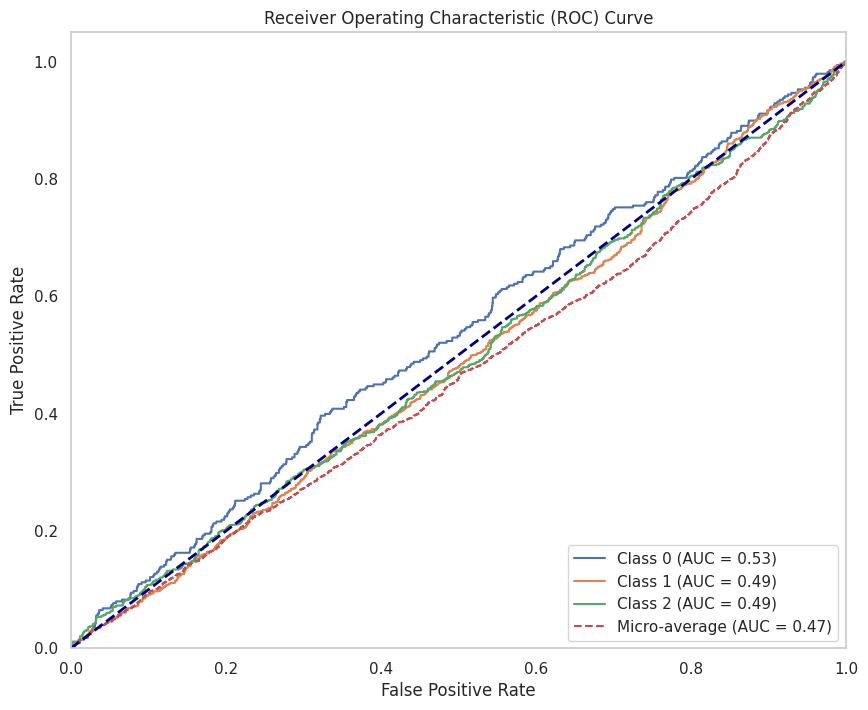

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC
num_classes = len(validation_df['Label'].unique())
y_true = validation_df['Label'].values
y_true_binarized = label_binarize(y_true, classes=range(num_classes))

# Create and compile the best model
best_model = create_model(study.best_trial)
optimizer = Adam(learning_rate=best_learning_rate)
best_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with the best parameters (optional for better results)
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validation_df,
    x_col='Image_Path',
    y_col='Label',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='raw'
)

# Predict probabilities on validation data
y_pred_prob = best_model.predict(validation_generator)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_binarized.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(10, 8))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot(fpr["micro"], tpr["micro"], label=f"Micro-average (AUC = {roc_auc['micro']:.2f})", linestyle="--")

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
best_model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_78 (Conv2D)              │ (None, 254, 254, 84)   │         2,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 127, 127, 84)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 125, 125, 84)   │        63,588 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 62, 62, 84)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_80 (Conv2D)              │ (None, 60, 60, 84)     │        63,588 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_26 (Flatten)            │ (None, 302400)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 64)             │    19,353,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,483,387 (74.32 MB)

 Trainable params: 19,483,387 (74.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np

# Simpan 20 titik koordinat ROC untuk setiap kelas (dari awal hingga akhir secara merata)
fpr = {}
tpr = {}
roc_auc = {}
roc_coords = {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    coords = list(zip(fpr[i], tpr[i]))
    total_points = len(coords)

    if total_points <= 20:
        roc_coords[i] = coords  # jika titik kurang dari 20, ambil semua
    else:
        indices = np.linspace(0, total_points - 1, 20, dtype=int)  # ambil 20 indeks merata
        roc_coords[i] = [coords[j] for j in indices]

# Tampilkan 20 titik terdistribusi dari awal sampai akhir
for i in range(num_classes):
    print(f"20 Titik ROC (merata) untuk Kelas {i}:")
    for coord in roc_coords[i]:
        print(f"FPR: {coord[0]:.4f}, TPR: {coord[1]:.4f}")
    print()


20 Titik ROC (merata) untuk Kelas 0:
FPR: 0.0000, TPR: 0.0000
FPR: 0.0321, TPR: 0.0444
FPR: 0.0860, TPR: 0.1065
FPR: 0.1295, TPR: 0.1568
FPR: 0.1838, TPR: 0.2101
FPR: 0.2320, TPR: 0.2574
FPR: 0.2781, TPR: 0.3225
FPR: 0.3185, TPR: 0.3846
FPR: 0.3822, TPR: 0.4438
FPR: 0.4542, TPR: 0.4911
FPR: 0.5101, TPR: 0.5473
FPR: 0.5510, TPR: 0.6065
FPR: 0.6214, TPR: 0.6509
FPR: 0.6706, TPR: 0.7041
FPR: 0.7400, TPR: 0.7574
FPR: 0.7784, TPR: 0.8018
FPR: 0.8281, TPR: 0.8462
FPR: 0.8850, TPR: 0.8994
FPR: 0.9441, TPR: 0.9527
FPR: 1.0000, TPR: 1.0000

20 Titik ROC (merata) untuk Kelas 1:
FPR: 0.0000, TPR: 0.0000
FPR: 0.0551, TPR: 0.0504
FPR: 0.1216, TPR: 0.1065
FPR: 0.1750, TPR: 0.1606
FPR: 0.2251, TPR: 0.2072
FPR: 0.2728, TPR: 0.2605
FPR: 0.3139, TPR: 0.3089
FPR: 0.3722, TPR: 0.3603
FPR: 0.4248, TPR: 0.4021
FPR: 0.4815, TPR: 0.4563
FPR: 0.5399, TPR: 0.5200
FPR: 0.5941, TPR: 0.5694
FPR: 0.6467, TPR: 0.6264
FPR: 0.7042, TPR: 0.6730
FPR: 0.7477, TPR: 0.7376
FPR: 0.7929, TPR: 0.7909
FPR: 0.8439, TPR: 0.8422


In [ ]:
import pandas as pd

# Buat list untuk menyimpan semua data koordinat
data = []

for i in range(num_classes):
    for idx, (fpr_val, tpr_val) in enumerate(roc_coords[i]):
        data.append({
            'Kelas': i,
            'Titik Ke': idx + 1,
            'FPR': round(fpr_val, 4),
            'TPR': round(tpr_val, 4)
        })

# Konversi ke DataFrame
df_roc_points = pd.DataFrame(data)

# Tampilkan DataFrame
df_roc_points


Kelas  Titik Ke     FPR     TPR
0       0         1  0.0000  0.0000
1       0         2  0.0321  0.0444
2       0         3  0.0860  0.1065
3       0         4  0.1295  0.1568
4       0         5  0.1838  0.2101
5       0         6  0.2320  0.2574
6       0         7  0.2781  0.3225
7       0         8  0.3185  0.3846
8       0         9  0.3822  0.4438
9       0        10  0.4542  0.4911
10      0        11  0.5101  0.5473
11      0        12  0.5510  0.6065
12      0        13  0.6214  0.6509
13      0        14  0.6706  0.7041
14      0        15  0.7400  0.7574
15      0        16  0.7784  0.8018
16      0        17  0.8281  0.8462
17      0        18  0.8850  0.8994
18      0        19  0.9441  0.9527
19      0        20  1.0000  1.0000
20      1         1  0.0000  0.0000
21      1         2  0.0551  0.0504
22      1         3  0.1216  0.1065
23      1         4  0.1750  0.1606
24      1         5  0.2251  0.2072
25      1         6  0.2728  0.2605
26      1         7  0.3139  0.3089
27      1         8  0.3722  0.3603
28      1         9  0.4248  0.4021
29      1        10  0.4815  0.4563
30      1        11  0.5399  0.5200
31      1        12  0.5941  0.5694
32      1        13  0.6467  0.6264
33      1        14  0.7042  0.6730
34      1        15  0.7477  0.7376
35      1        16  0.7929  0.7909
36      1        17  0.8439  0.8422
37      1        18  0.8924  0.9087
38      1        19  0.9556  0.9582
39      1        20  1.0000  1.0000
40      2         1  0.0000  0.0000
41      2         2  0.0540  0.0637
42      2         3  0.1072  0.1138
43      2         4  0.1619  0.1570
44      2         5  0.2173  0.2127
45      2         6  0.2612  0.2560
46      2         7  0.3158  0.3094
47      2         8  0.3719  0.3584
48      2         9  0.4245  0.4061
49      2        10  0.4791  0.4562
50      2        11  0.5338  0.4972
51      2        12  0.5871  0.5700
52      2        13  0.6367  0.6143
53      2        14  0.6777  0.6689
54      2        15  0.7468  0.7338
55      2        16  0.7928  0.7941
56      2        17  0.8482  0.8373
57      2        18  0.9094  0.8874
58      2        19  0.9604  0.9397
59      2        20  1.0000  1.0000

In [ ]:
# Hitung AUC dari 20 titik ROC yang telah diambil secara merata
auc_from_20_points = {}

for i in range(num_classes):
    coords = roc_coords[i]
    auc_value = 0.0
    for j in range(len(coords) - 1):
        x0, y0 = coords[j]
        x1, y1 = coords[j + 1]
        delta_x = x1 - x0
        avg_y = (y0 + y1) / 2
        auc_value += delta_x * avg_y
    auc_from_20_points[i] = auc_value

# Tampilkan AUC hasil integral numerik dari 20 titik
for i in range(num_classes):
    print(f"AUC (20 titik) untuk Kelas {i}: {auc_from_20_points[i]:.4f}")


AUC (20 titik) untuk Kelas 0: 0.5302
AUC (20 titik) untuk Kelas 1: 0.4883
AUC (20 titik) untuk Kelas 2: 0.4890
